Saving penguins-raw.xlsx to penguins-raw.xlsx

--- Aperçu brut ---
  studyName  Sample Number                              Species  Region  \
0   PAL0708              1  Adelie Penguin (Pygoscelis adeliae)  Anvers   
1   PAL0708              2  Adelie Penguin (Pygoscelis adeliae)  Anvers   
2   PAL0708              3  Adelie Penguin (Pygoscelis adeliae)  Anvers   
3   PAL0708              4  Adelie Penguin (Pygoscelis adeliae)  Anvers   
4   PAL0708              5  Adelie Penguin (Pygoscelis adeliae)  Anvers   

      Island               Stage Individual ID Clutch Completion   Date Egg  \
0  Torgersen  Adult, 1 Egg Stage          N1A1               Yes 2007-11-11   
1  Torgersen  Adult, 1 Egg Stage          N1A2               Yes 2007-11-11   
2  Torgersen  Adult, 1 Egg Stage          N2A1               Yes 2007-11-16   
3  Torgersen  Adult, 1 Egg Stage          N2A2               Yes 2007-11-16   
4  Torgersen  Adult, 1 Egg Stage          N3A1               Yes 2007-11-16   

   Culm

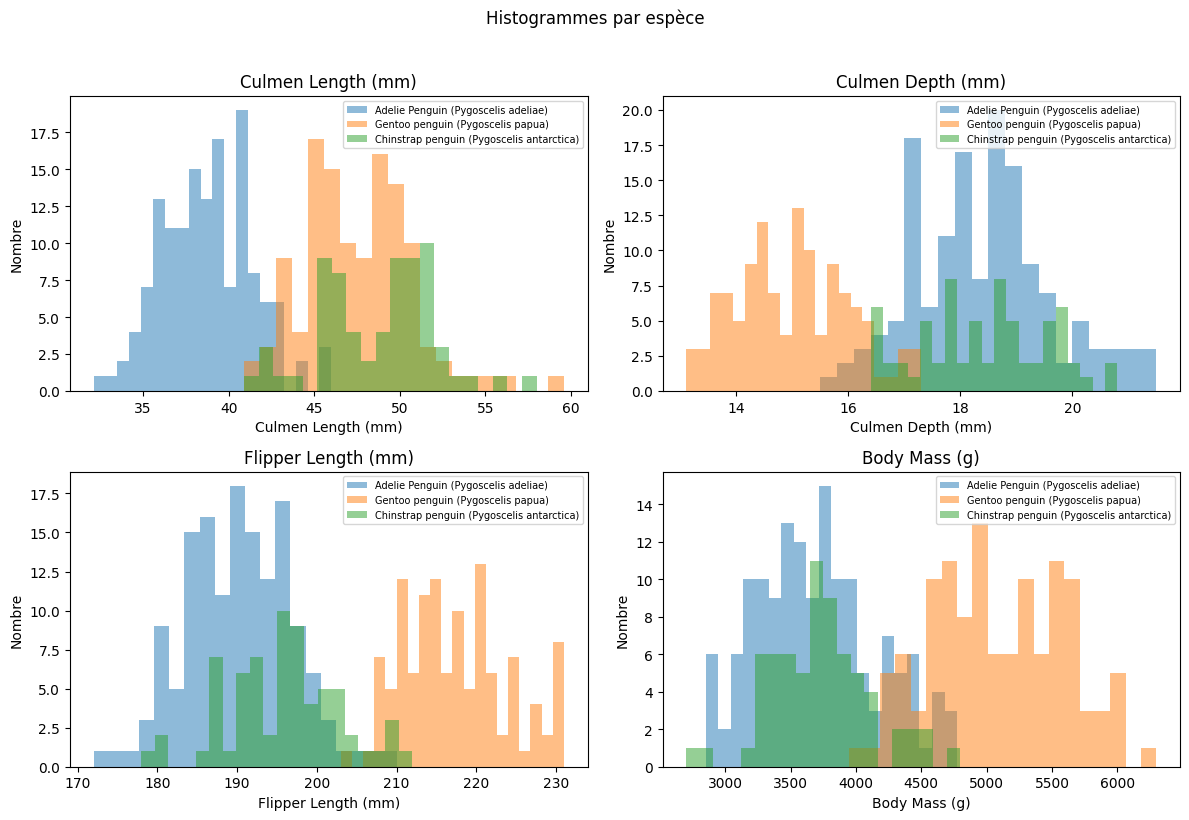


--- Aperçu de X ---
      Island  Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
0  Torgersen                39.1               18.7                181.0   
1  Torgersen                39.5               17.4                186.0   
2  Torgersen                40.3               18.0                195.0   
3  Torgersen                36.7               19.3                193.0   
4  Torgersen                39.3               20.6                190.0   

   Body Mass (g)     Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  
0         3750.0    MALE           8.658585          -25.83352  
1         3800.0  FEMALE           8.949560          -24.69454  
2         3250.0  FEMALE           8.368210          -25.33302  
3         3450.0  FEMALE           8.766510          -25.32426  
4         3650.0    MALE           8.664960          -25.29805  

Num features : ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C

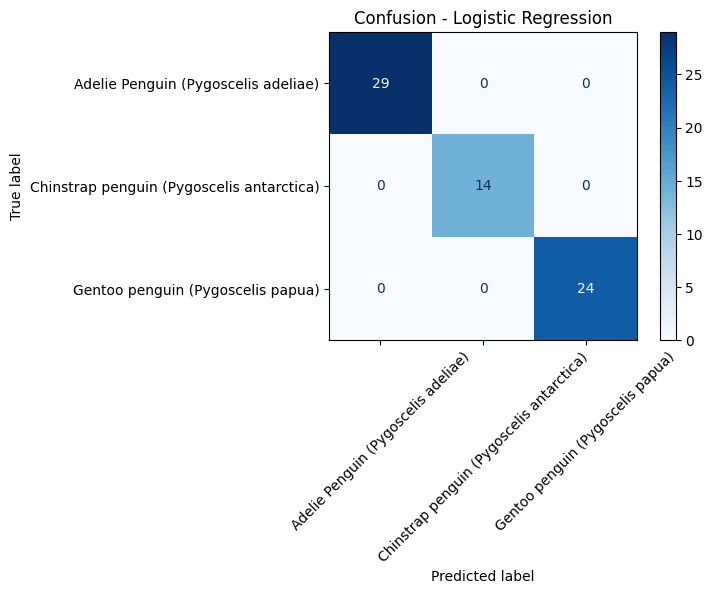


Modèle : Random Forest
Balanced acc : 0.976
F1 macro : 0.982

Report :
                                           precision    recall  f1-score   support

      Adelie Penguin (Pygoscelis adeliae)       0.97      1.00      0.98        29
Chinstrap penguin (Pygoscelis antarctica)       1.00      0.93      0.96        14
        Gentoo penguin (Pygoscelis papua)       1.00      1.00      1.00        24

                                 accuracy                           0.99        67
                                macro avg       0.99      0.98      0.98        67
                             weighted avg       0.99      0.99      0.98        67



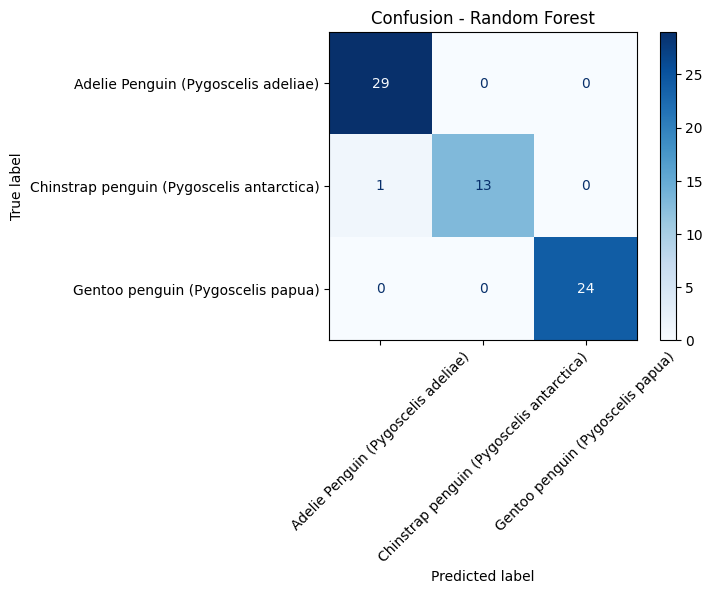


Modèle : Naive Bayes
Balanced acc : 0.885
F1 macro : 0.852

Report :
                                           precision    recall  f1-score   support

      Adelie Penguin (Pygoscelis adeliae)       1.00      0.66      0.79        29
Chinstrap penguin (Pygoscelis antarctica)       0.78      1.00      0.88        14
        Gentoo penguin (Pygoscelis papua)       0.80      1.00      0.89        24

                                 accuracy                           0.85        67
                                macro avg       0.86      0.89      0.85        67
                             weighted avg       0.88      0.85      0.84        67



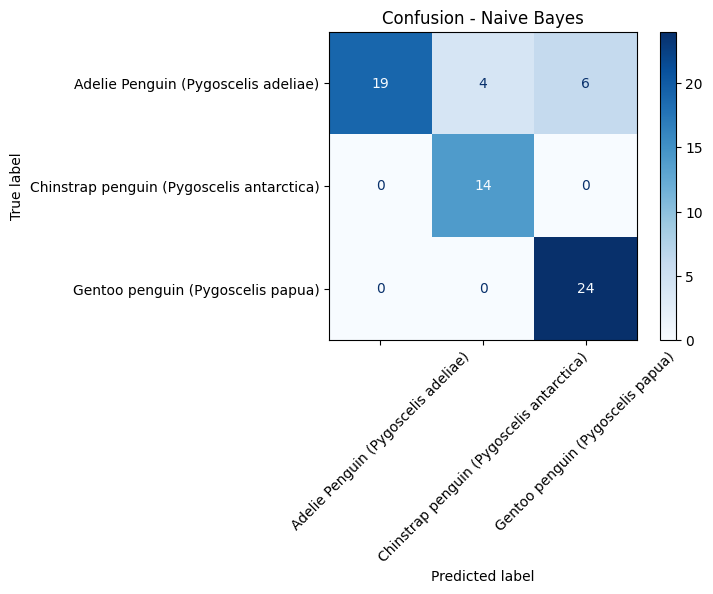


=== Résumé modèles ===
Logistic Regression | balanced = 1.0 | F1 = 1.0
Random Forest | balanced = 0.976 | F1 = 0.982
Naive Bayes | balanced = 0.885 | F1 = 0.852

Variables utilisées pour KDE/LDA :
['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']

KDE kernel = gaussian
Meilleur h = 0.1801173528334133  | score CV = 0.997
Balanced acc test: 1.0
F1 test: 1.0


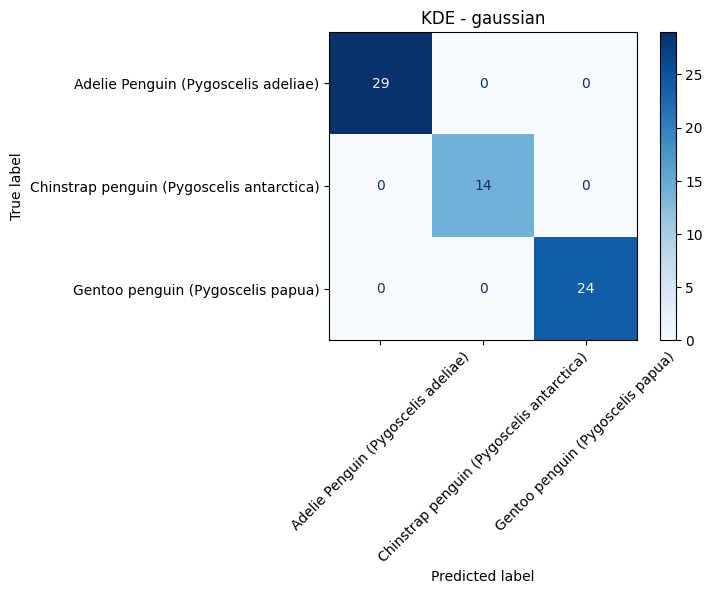


KDE kernel = tophat
Meilleur h = 1.8957356524063753  | score CV = 0.985
Balanced acc test: 0.965
F1 test: 0.965


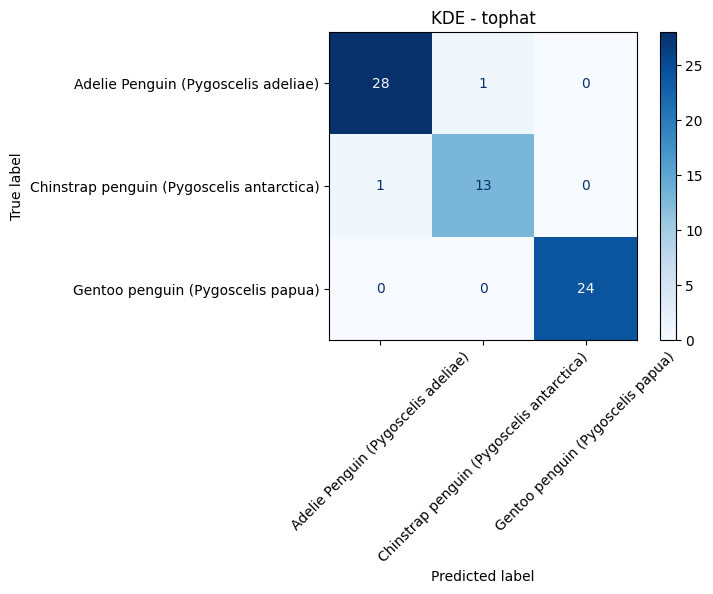


KDE kernel = epanechnikov
Meilleur h = 1.8957356524063753  | score CV = 0.994
Balanced acc test: 1.0
F1 test: 1.0


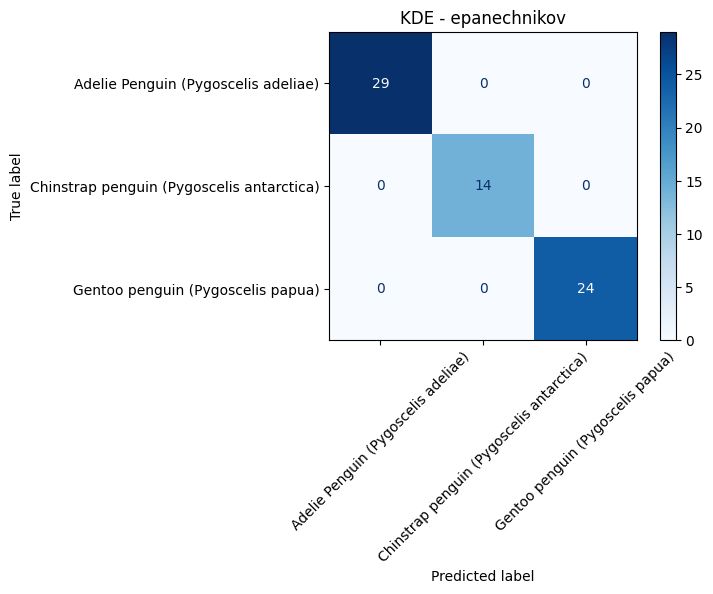


KDE kernel = exponential
Meilleur h = 0.324422607917163  | score CV = 0.997
Balanced acc test: 1.0
F1 test: 1.0


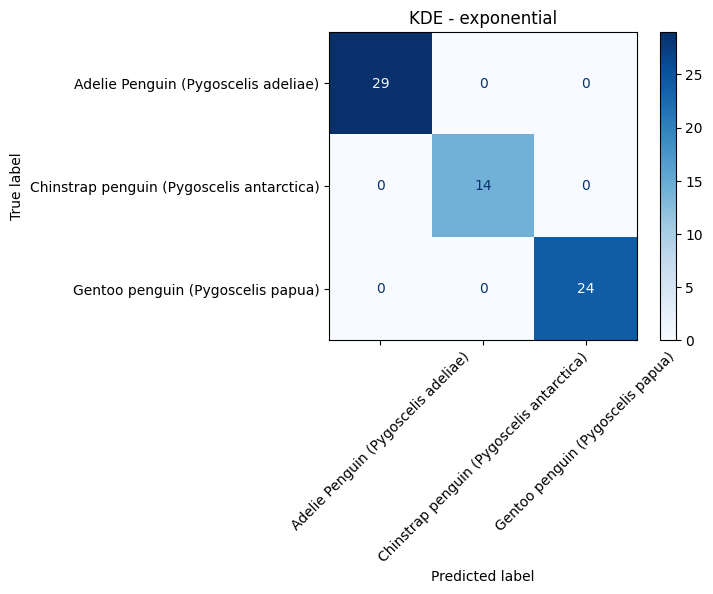


=== KDE ===
gaussian | h= 0.18 | CV= 0.997 | bal= 1.0 | f1= 1.0
epanechnikov | h= 1.896 | CV= 0.994 | bal= 1.0 | f1= 1.0
exponential | h= 0.324 | CV= 0.997 | bal= 1.0 | f1= 1.0
tophat | h= 1.896 | CV= 0.985 | bal= 0.965 | f1= 0.965

=== LDA ===
Balanced acc : 1.0
F1 macro : 1.0


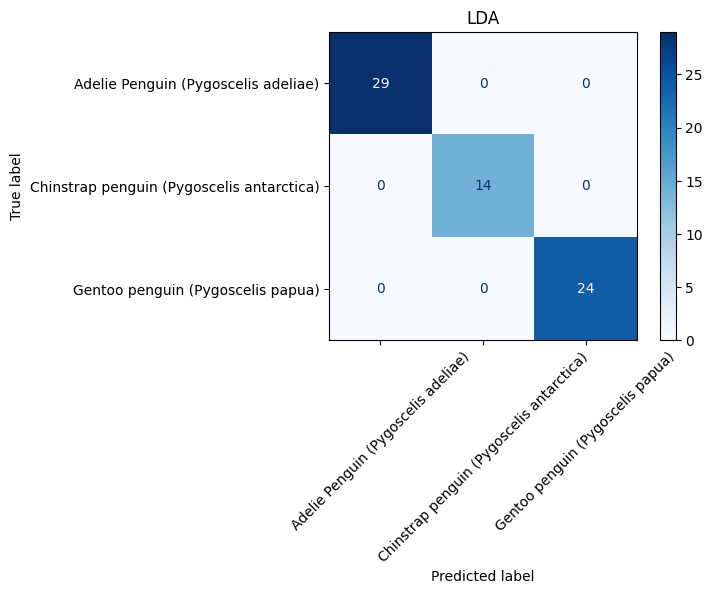

In [2]:
# imports un peu classiques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()   # on upload le fichier excel ici

# libs sklearn
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    balanced_accuracy_score,
    f1_score,
    classification_report,
)

from sklearn.neighbors import KernelDensity
from sklearn.base import BaseEstimator, ClassifierMixin

plt.rcParams["figure.figsize"] = (6, 4)


# Chargement ensuit nettoyage


df = pd.read_excel("penguins-raw.xlsx")   # on lit l'excel
print("\n--- Aperçu brut ---")
print(df.head())

print("\n--- Info ---")
print(df.info())
print("\n--- Valeurs manquantes avant nettoyage ---")
print(df.isna().sum())
print("\n--- Nettoyage ---")
print("Taille avant :", df.shape)

#on doit garder que MALE / FEMALE les autre on vire
df = df[df["Sex"].isin(["MALE", "FEMALE"])]

# on remplace les NA numérique par la mediane
num_cols_all = df.select_dtypes(include=["int64", "float64"]).columns
df[num_cols_all] = df[num_cols_all].fillna(df[num_cols_all].median())

df = df.reset_index(drop=True)
print("Taille après :", df.shape)
print("\nValeurs manquantes après nettoyage :")
print(df.isna().sum())

# stats descriptives


print("\n--- Stats globales ---")
print(df[num_cols_all].describe())

print("\n--- Moyennes par espèce (morpho) ---")
print(
    df.groupby("Species")[
        ["Culmen Length (mm)",
         "Culmen Depth (mm)",
         "Flipper Length (mm)",
         "Body Mass (g)"]
    ].mean()
)

print("\n--- Effectifs espèces ---")
print(df["Species"].value_counts())

print("\n--- Espèce vs Île ---")
print(pd.crosstab(df["Island"], df["Species"]))
cols = ["Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Body Mass (g)"]
species_list = df["Species"].unique()

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for i, col in enumerate(cols):
    ax = axes[i]
    for sp in species_list:
        x = df[df["Species"] == sp][col]
        ax.hist(x, bins=20, alpha=0.5, label=sp)

    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel("Nombre")
    ax.legend(fontsize=7)

plt.suptitle("Histogrammes par espèce", y=1.02)
plt.tight_layout()
plt.show()


#Préparation X/y apres prétraitement (pipeline)


y = df["Species"]

cols_to_drop = [
    "Species","studyName","Sample Number","Region","Stage",
    "Individual ID","Clutch Completion","Date Egg","Comments"
]

# X final
X = df.drop(columns=[c for c in cols_to_drop if c in df.columns])
print("\n--- Aperçu de X ---")
print(X.head())
numeric_features = X.select_dtypes(include=["int64","float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns
print("\nNum features :", list(numeric_features))
print("Cat features :", list(categorical_features))
# prépa num ducoup remplissage médiane et standardisation
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
# remplir avec plus frequent + OneHot en binaire
categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

#transformer tout
preprocess = ColumnTransformer([
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features),
])

#division en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


#Test des trois classifieurs classiques


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42),
    "Naive Bayes": GaussianNB(),
}
results = []
for name, model in models.items():
    print("\n=======================")
    print("Modèle :", name)
    print("=======================")

    clf = Pipeline([
        ("preprocess", preprocess),
        ("model", model)
    ])

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    bal = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="macro")
    print("Balanced acc :", round(bal,3))
    print("F1 macro :", round(f1,3))
    print("\nReport :")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
    disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(y))
    disp.plot(cmap="Blues", xticks_rotation=45)
    plt.title("Confusion - "+name)
    plt.show()

    results.append((name, bal, f1))
print("\n=== Résumé modèles ===")
for name, bal, f1 in sorted(results, key=lambda x: x[1], reverse=True):
    print(name, "| balanced =", round(bal,3), "| F1 =", round(f1,3))


#Classification KDE non parametrq + comparaison LDA
# On prend les variables num pour KDE et LDA
X_train_num = X_train[numeric_features].copy()
X_test_num  = X_test[numeric_features].copy()

print("\nVariables utilisées pour KDE/LDA :")
print(list(numeric_features))

# ---- classifieur KDE  ----
class KDEClassifier(BaseEstimator, ClassifierMixin):
    """classif KDE simple, version multi-dim"""
    def __init__(self, bandwidth=1.0, kernel="gaussian"):
        self.bandwidth = bandwidth
        self.kernel = kernel
    def fit(self, X, y):
        X = np.asarray(X)
        self.classes_, y_idx = np.unique(y, return_inverse=True)
        self.kdes = []
        self.log_priors = []
        n = X.shape[0]
        for i, c in enumerate(self.classes_):
            Xc = X[y_idx == i]
            kde = KernelDensity(bandwidth=self.bandwidth, kernel=self.kernel)
            kde.fit(Xc)
            self.kdes.append(kde)
            self.log_priors.append(np.log(len(Xc) / n))
        self.log_priors = np.array(self.log_priors)
        return self
    def predict_proba(self, X):
        X = np.asarray(X)
        log_p = np.vstack([
            kde.score_samples(X) + lp
            for kde, lp in zip(self.kdes, self.log_priors)
        ]).T
        log_p -= log_p.max(axis=1, keepdims=True)
        p = np.exp(log_p)
        p /= p.sum(axis=1, keepdims=True)
        return p
    def predict(self, X):
        return self.classes_[np.argmax(self.predict_proba(X), axis=1)]
# ---- On tourne sur different noyaux ----
kernels = ["gaussian", "tophat", "epanechnikov", "exponential"]
bandwidths = np.logspace(-1, 1.3, 10)
cv = StratifiedKFold(5, shuffle=True, random_state=42)

kde_res = []

for kernel in kernels:
    print("\nKDE kernel =", kernel)

    pipe_kde = Pipeline([
        ("scaler", StandardScaler()),
        ("kde", KDEClassifier(kernel=kernel))
    ])

    grid = GridSearchCV(
        pipe_kde,
        param_grid={"kde__bandwidth": bandwidths},
        cv=cv,
        scoring="balanced_accuracy",
        n_jobs=-1
    )

    grid.fit(X_train_num, y_train)

    best_h = grid.best_params_["kde__bandwidth"]
    best_cv = grid.best_score_
    print("Meilleur h =", best_h, " | score CV =", round(best_cv,3))
    best = grid.best_estimator_
    y_pred_kde = best.predict(X_test_num)
    bal = balanced_accuracy_score(y_test, y_pred_kde)
    f1 = f1_score(y_test, y_pred_kde, average="macro")
    print("Balanced acc test:", round(bal,3))
    print("F1 test:", round(f1,3))
    cm = confusion_matrix(y_test, y_pred_kde)
    disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(y))
    disp.plot(cmap="Blues", xticks_rotation=45)
    plt.title("KDE - "+kernel)
    plt.show()
    kde_res.append((kernel, best_h, best_cv, bal, f1))
print("\n=== KDE ===")
for k, h, cvscore, bal, f1 in sorted(kde_res, key=lambda x: x[3], reverse=True):
    print(k, "| h=", round(h,3), "| CV=", round(cvscore,3),
          "| bal=", round(bal,3), "| f1=", round(f1,3))

# LDA (comparaison)
pipe_lda = Pipeline([
    ("scaler", StandardScaler()),
    ("lda", LinearDiscriminantAnalysis())
])

pipe_lda.fit(X_train_num, y_train)
y_pred_lda = pipe_lda.predict(X_test_num)

bal_lda = balanced_accuracy_score(y_test, y_pred_lda)
f1_lda = f1_score(y_test, y_pred_lda, average="macro")

print("\n=== LDA ===")
print("Balanced acc :", round(bal_lda,3))
print("F1 macro :", round(f1_lda,3))

cm = confusion_matrix(y_test, y_pred_lda)
disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(y))
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("LDA")
plt.show()
